# 단어 사전 만들기

## 데이터 다운로드 및 분석

In [20]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [21]:
!curl -L -o korean-english-park.train.tar.gz https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

 52 8514k   52 4432k    0     0  9624k      0 --:--:-- --:--:-- --:--:-- 9624k
100 8514k  100 8514k    0     0  10.3M      0 --:--:-- --:--:-- --:--:-- 11.6M


In [28]:
import urllib.request
import os

base_path = r"C:\DeepLearning\sp_tokenizer\data"
os.makedirs(base_path, exist_ok=True)

save_path = os.path.join(base_path, "korean-english-park.train.tar.gz")

url = "https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz"

urllib.request.urlretrieve(url, save_path)
print("✅ 지정된 경로에 다운 완료:", save_path)

✅ 지정된 경로에 다운 완료: C:\DeepLearning\sp_tokenizer\data\korean-english-park.train.tar.gz


In [30]:
import tarfile

file_path = r"C:\DeepLearning\sp_tokenizer\data\korean-english-park.train.tar.gz"
extract_path = r"C:\DeepLearning\sp_tokenizer\data"

with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall(path=extract_path)

print("✅ 압축 해제 완료")

✅ 압축 해제 완료


C:\Users\juwonhee\AppData\Local\Temp\ipykernel_13952\259450332.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


In [31]:
import os

path_to_file = os.path.join(base_path, "korean-english-park.train.ko")

# 파일 읽기
with open(path_to_file, "r", encoding="utf-8") as f:
    raw = f.read().splitlines()

# 간단히 확인
print("Data Size:", len(raw))
print("Example:")
for sen in raw[0:100][::20]:
    print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


각 문장이 어느 정도 길이를 가지는 지 확인  
1. 지나치게 긴 데이터 삭제
2. 지나치게 짧은 데이터 검증  
  
=> 데이터를 얼마나 사용할 지 타협점을 정의

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


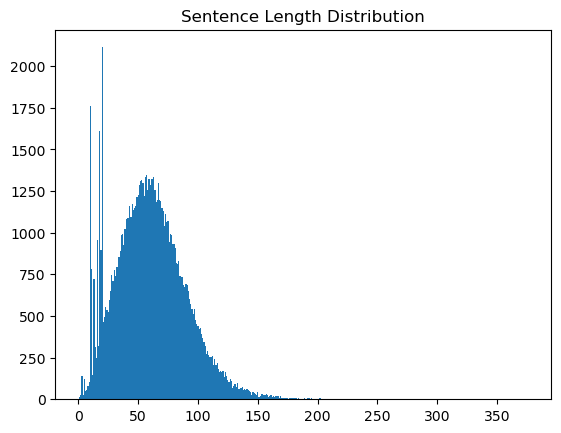

In [32]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

길이가 1인 문장

In [33]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [38]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [39]:
check_sentence_with_length(raw, idx+1)

throwaway 사용 후 버리는  / cell phone 이동 전화, 휴대폰  / be set to do 할 준비가 되어있다  / make one's debut 처음 소개되다  / convenience store 편의점   / shelve 선반, (상품) 진열대  / aisle 길다란 통로  / down the aisle from  이 있는 통로 아랫쪽에  / razor 면도기  / beef jerky 말린 쇠고기  / disposable camera 일회용 카메라  / seek 하려고 애쓰다  / emulate 에 지지 않으려고 애쓰다, 겨루다  / spur-of-the-moment 충동적인  / consumer 소비자  / purchase 구매, 구매품 번역 :


Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


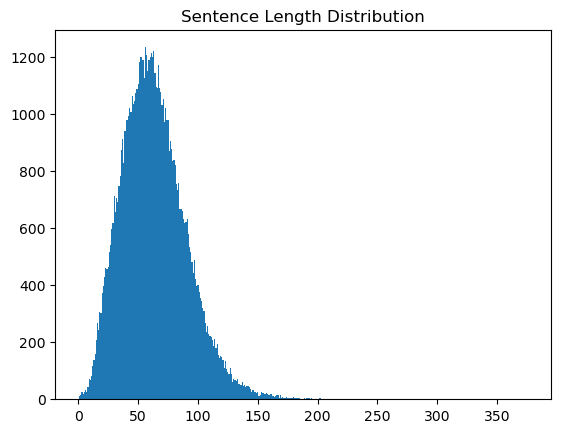

In [40]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

미니 배치 특성상 각 데이터의 크기가 모두 동일해야 하기 때문에 가장 긴 데이터를 기준으로 padding처리  
1. 길이 150 이상의 데이터를 제거
2. 길이가 10 미만인 데이터도 제거

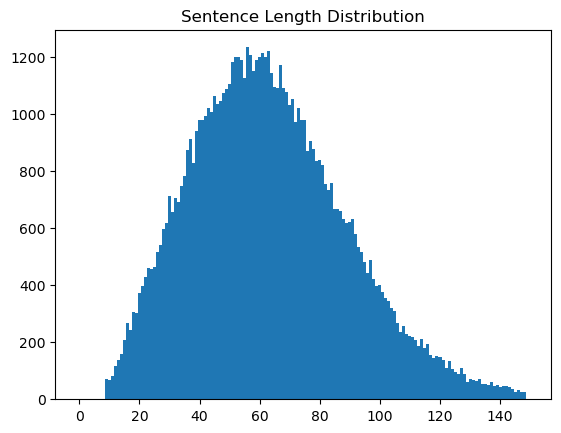

In [41]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## 공백 기반 토큰화

정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 리스트 split_corpus에 저장한 후,  
아래 tokenize() 함수를 사용해 단어 사전과 Tensor 데이터 얻기

In [42]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [43]:
# 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [44]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [45]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


 1번 단어인 밝혔다. 는 밝히다 , 밝다 등과 유사한 의미를 지니고 있음에도 전혀 다른 단어로 분류된다.  
 이 때문에 공백 기반 토큰화는 불필요하게 큰 단어 사전을 가지게 되며 이는 연산량 증가로 이어진다.  
 => 이를 위해 형태소 분석기가 존재

## 형태소 기반 토큰화

한국어 형태소 분석기는 대표적으로 Khaiii와 KoNLPy가 사용된다.  
그중에서도 가장 성능이 준수한 MeCab클래스를 활용한다.

In [59]:
# !pip install eunjeon

In [61]:
# import sys
# print(sys.executable)

In [64]:
# import sys
# !{sys.executable} -m pip install eunjeon

In [57]:
from eunjeon import Mecab

mecab = Mecab()

def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [58]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 51929


### Decoding
- tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
- tokenizer.index_word 를 사용하여 Decoding

In [65]:
mecab_tensor[100]

array([   30,     4,   191,   714,  2948,    16,  7495,    18,   586,
           6,  2286,     5,   321,    10,    36,   157,   836,    39,
       14354,     2,     1,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0])

In [69]:
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

그 는 또한 아프가니스탄 중심부 에서 영원 한 자유 의 획득 을 지지 하 기 위한 비행 도 가졌었 다 .


In [72]:
texts= ""

for w in mecab_tensor[100]:
    if w==0: continue
    texts += mecab_tokenizer.index_word[w] + " "


print(texts)

그 는 또한 아프가니스탄 중심부 에서 영원 한 자유 의 획득 을 지지 하 기 위한 비행 도 가졌었 다 . 
